In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import re
from googletrans import Translator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/obotsman/reviews_jun_2022-2023_clean.csv') #upload the file with extracted reviews

In [3]:
jan = pd.read_csv('/Users/obotsman/Downloads/Feedback from Social-January 2023.csv')
feb = pd.read_csv('/Users/obotsman/Downloads/Feedback from Social-February 2023.csv')
march = pd.read_csv('/Users/obotsman/Downloads/Feedback from Social-March 2023.csv')
apr = pd.read_csv('/Users/obotsman/Downloads/Feedback from Social-April 2023.csv')
may = pd.read_csv('/Users/obotsman/Downloads/Feedback from Social-May 2023.csv')
jun = pd.read_csv('/Users/obotsman/Downloads/Feedback from Social-June 2023.csv')

In [4]:
jan.head()

,Date of CM's Entry,Review/Comment date,Source,User Language,Collaborator,Link (native),Username,Topic,Sentiment,Comment,...,Falcon link,Country,Registered e-mail,CP link,Account Number,Chat link,Attachments,Deposit #,Payment System,Status
0,1/1/2023,NaN,Instagram INDIA,NaN,Intan Indahsari,https://www.instagram.com/direct/t/34028236684...,@sidh_1105,Spread Issue,Negative,What are the currency which is always below 2 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,NaN,Telegram,NaN,Daniel Victoria,https://t.me/c/1693581491/451926,prosperity,Trading Instruments,Suggestion,All tradable instrument should be available on...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2023,NaN,Instagram INDIA,NaN,Intan Indahsari,https://www.instagram.com/direct/t/34028236684...,fact_walla_bhai,OctaFX Services,Positive,"Myself Tulsi Sarmah. I'm not trading now, but ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2023,NaN,Twitter INDIA,NaN,Intan Indahsari,https://twitter.com/messages/13805153265851555...,Shikhar Negi,"150 assets,Regulation",Neutral,Yes I understand your POV too. But it would be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2023,NaN,Trustpilot,NaN,Mirna Melani,https://businessapp.b2b.trustpilot.com/reviews...,Dhirendra Kumar,Customer Support,Suggestion,To provide call support.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airtable_all = pd.concat([jan, feb, march, apr, may, jun], ignore_index=True)
airtable_all #merging all months in one dataframe

,Date of CM's Entry,Review/Comment date,Source,User Language,Collaborator,Link (native),Username,Topic,Sentiment,Comment,...,Falcon link,Country,Registered e-mail,CP link,Account Number,Chat link,Attachments,Deposit #,Payment System,Status
0,1/1/2023,NaN,Instagram INDIA,NaN,Intan Indahsari,https://www.instagram.com/direct/t/34028236684...,@sidh_1105,Spread Issue,Negative,What are the currency which is always below 2 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,NaN,Telegram,NaN,Daniel Victoria,https://t.me/c/1693581491/451926,prosperity,Trading Instruments,Suggestion,All tradable instrument should be available on...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2023,NaN,Instagram INDIA,NaN,Intan Indahsari,https://www.instagram.com/direct/t/34028236684...,fact_walla_bhai,OctaFX Services,Positive,"Myself Tulsi Sarmah. I'm not trading now, but ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2023,NaN,Twitter INDIA,NaN,Intan Indahsari,https://twitter.com/messages/13805153265851555...,Shikhar Negi,"150 assets,Regulation",Neutral,Yes I understand your POV too. But it would be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2023,NaN,Trustpilot,NaN,Mirna Melani,https://businessapp.b2b.trustpilot.com/reviews...,Dhirendra Kumar,Customer Support,Suggestion,To provide call support.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,6/2/2023,6/2/2023,Facebook INT,English,Afiq Khalid,NaN,Ravindu Div,General,Suggestion,But I think if you can use like this with the ...,...,https://app.falcon.io/#/engage/overview/f45d50...,India,NaN,NaN,NaN,NaN,app.falcon.jpg (https://v5.airtableusercontent...,NaN,NaN,NaN
2711,6/2/2023,6/1/2023,Facebook INT,English,Afifah Allimi,https://business.facebook.com/latest/inbox/mes...,Lhord Jay Halael,Spread,Negative,it should be a zero spread\nLook at ur 4hrs ti...,...,https://app.falcon.io/#/engage/overview/f45d50...,NaN,NaN,NaN,NaN,NaN,SS2.png (https://v5.airtableusercontent.com/v1...,NaN,NaN,NaN
2712,6/2/2023,6/1/2023,Instagram INT,English,Alua Zhanybekova,https://www.instagram.com/p/Cs4clnTM3u6/,@aristokratelesin,Copytrading,Positive,"its awesome, such a nice platform ❤️",...,https://app.falcon.io/#/engage/overview/210928...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2713,6/2/2023,6/2/2023,Facebook INT,English,Intan Indahsari,https://www.instagram.com/direct/t/17846430572...,dhajhude12,Types of Account,Neutral,How do I open a cent account? \n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
airtable_all.isnull().sum()

Date of CM's Entry        0
Review/Comment date     259
Source                   21
User Language           180
Collaborator             21
Link (native)            63
Username                 36
Topic                    28
Sentiment                22
Comment                  26
Notes                  2449
Slack link             2634
Falcon link             775
Country                1345
Registered e-mail      2662
CP link                2596
Account Number         2663
Chat link              2713
Attachments            2685
Deposit #              2694
Payment System         2689
Status                 2643
dtype: int64

In [7]:
columns_to_drop = ['Collaborator', 'User Language', 'Link (native)', 'Notes', 'Username', 'Slack link', 'Falcon link', 'Country', 'Registered e-mail', 'CP link', 'Account Number', 'Chat link', 'Attachments', 'Deposit #', 'Payment System', 'Status']
airtable_all = airtable_all.drop(columns_to_drop, axis=1) #removing the columns we don't need

In [8]:
airtable_all.isnull().sum()

Date of CM's Entry       0
Review/Comment date    259
Source                  21
Topic                   28
Sentiment               22
Comment                 26
dtype: int64

In [10]:
airtable_all = airtable_all.dropna(subset=['Comment']) #deleting the rows where comment is null, we don't need null reviews

In [21]:
airtable_all

,Source,Opinion,Topic,Sentiment,Review/Comment date
0,Instagram INDIA,What are the currency which is always below 2 ...,Spread Issue,Negative,2023-01-01
1,Telegram,All tradable instrument should be available on...,Trading Instruments,Suggestion,2023-01-01
2,Instagram INDIA,"Myself Tulsi Sarmah. I'm not trading now, but ...",OctaFX Services,Positive,2023-01-01
3,Twitter INDIA,Yes I understand your POV too. But it would be...,"150 assets,Regulation",Neutral,2023-01-01
4,Trustpilot,To provide call support.,Customer Support,Suggestion,2023-01-01
...,...,...,...,...,...
2710,Facebook INT,But I think if you can use like this with the ...,General,Suggestion,2023-06-02
2711,Facebook INT,it should be a zero spread\nLook at ur 4hrs ti...,Spread,Negative,2023-06-01
2712,Instagram INT,"its awesome, such a nice platform ❤️",Copytrading,Positive,2023-06-01
2713,Facebook INT,How do I open a cent account? \n,Types of Account,Neutral,2023-06-02


In [13]:
airtable_all['Review/Comment date'].fillna(airtable_all["Date of CM's Entry"], inplace=True) #if comment date is null, we put the date of cm's entry

In [14]:
airtable_all = airtable_all.drop("Date of CM's Entry", axis=1)

In [15]:
airtable_all['Review/Comment date'] = pd.to_datetime(airtable_all['Review/Comment date'], format='%m/%d/%Y', errors='coerce')

In [16]:
date_column = airtable_all.pop('Review/Comment date')
airtable_all.insert(4, 'Review/Comment date', date_column)

topic_column = airtable_all.pop('Topic')
airtable_all.insert(3, 'Topic', topic_column)

sentiment_column = airtable_all.pop('Sentiment')
airtable_all.insert(3, 'Sentiment', sentiment_column)

#changing the order of the columns to have them the same in both dataframes to merge later

In [22]:
airtable_all.rename(columns={'Comment': 'Opinion'}, inplace=True) #renaming the columns to have them the same in both dataframes to be able to merge them later

In [29]:
df.head()

,Source,Opinion,Sentiment,Topic,Review/Comment date
Unnamed: 0,,,,,
0,airtable,"Big spread, little leverage. Withdraw on wee...",Negative,"Leverage, Spread Issue, Withdrawal",2022-07-25
1,airtable,SAY NO TO WIDE SPREAD :joy:,Negative,Spread Issue,2022-07-25
2,airtable,Mantap... saran saya tolong tambahkan akun cen,Suggestion,Types of Account,2022-07-24
3,airtable,Very Good App For Trading But the Only issue...,Negative,"Bug, Connection Problem",2022-07-22
4,airtable,Can be better if they allow indicators to be...,Suggestion,Trading Platforms,2022-07-22


In [24]:
df.set_index('Unnamed: 0', inplace=True)

In [25]:
df['ts'] = pd.to_datetime(df['ts']) #changing the right format of date

In [26]:
df['Review/Comment date'] = df['ts'].dt.date #creating new column with only date

In [27]:
df = df.drop('ts', axis=1) #removing the old column

In [28]:
df.rename(columns={'sentiment': 'Sentiment'}, inplace=True) #renaming the columns to have them the same in both dataframes to be able to merge them later
df.rename(columns={'bot': 'Source'}, inplace=True)
df.rename(columns={'topic': 'Topic'}, inplace=True)

In [30]:
df = pd.concat([df, airtable_all], ignore_index=True)
df

,Source,Opinion,Sentiment,Topic,Review/Comment date
0,airtable,"Big spread, little leverage. Withdraw on wee...",Negative,"Leverage, Spread Issue, Withdrawal",2022-07-25
1,airtable,SAY NO TO WIDE SPREAD :joy:,Negative,Spread Issue,2022-07-25
2,airtable,Mantap... saran saya tolong tambahkan akun cen,Suggestion,Types of Account,2022-07-24
3,airtable,Very Good App For Trading But the Only issue...,Negative,"Bug, Connection Problem",2022-07-22
4,airtable,Can be better if they allow indicators to be...,Suggestion,Trading Platforms,2022-07-22
...,...,...,...,...,...
3525,Facebook INT,But I think if you can use like this with the ...,Suggestion,General,2023-06-02 00:00:00
3526,Facebook INT,it should be a zero spread\nLook at ur 4hrs ti...,Negative,Spread,2023-06-01 00:00:00
3527,Instagram INT,"its awesome, such a nice platform ❤️",Positive,Copytrading,2023-06-01 00:00:00
3528,Facebook INT,How do I open a cent account? \n,Neutral,Types of Account,2023-06-02 00:00:00


In [31]:
df['Topic'].value_counts() #see how many topics we have and how many reviews under each topic

OctaFX Services                                       317
Advertisement                                         199
Influencer                                            143
Webinar                                               140
Trade And Win                                         126
                                                     ... 
Affiliate program IB,Binary vs Forex,Deposit Bonus      1
OctaFX Services ,Customer Support,Trading App           1
Trading Schedule                                        1
Leverage,Spread Issue                                   1
Telegram,Signals                                        1
Name: Topic, Length: 646, dtype: int64

In [32]:
df = df.drop_duplicates(subset=['Opinion'], keep=False) #remove duplicated reviews

In [33]:
df.info

<bound method DataFrame.info of              Source                                            Opinion  \
0          airtable    Big spread, little leverage. Withdraw on wee...   
1          airtable                        SAY NO TO WIDE SPREAD :joy:   
2          airtable     Mantap... saran saya tolong tambahkan akun cen   
3          airtable    Very Good App For Trading But the Only issue...   
4          airtable    Can be better if they allow indicators to be...   
...             ...                                                ...   
3525   Facebook INT  But I think if you can use like this with the ...   
3526   Facebook INT  it should be a zero spread\nLook at ur 4hrs ti...   
3527  Instagram INT               its awesome, such a nice platform ❤️   
3528   Facebook INT                   How do I open a cent account? \n   
3529       Telegram  any particular reason why it’s getting delayed...   

       Sentiment                               Topic  Review/Comment date  
0  

In [34]:
df['Topic'].isnull().sum() #see how many topics are missing in the file

263

In [35]:
def remove_symbols(text): #remove symbols from reviews for translation
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)

df['Opinion'] = df['Opinion'].apply(remove_symbols)

In [36]:
translator = Translator(service_urls=['translate.google.com']) #translate reviews which are not in English, it takes some minutes
target_language = 'en'

def translate_opinion(x):
    try:
        translation = translator.translate(x, dest=target_language)
        return translation.text if translation is not None else ''
    except:
        return ''

df['Opinion'] = df['Opinion'].apply(lambda x: translate_opinion(x))

In [37]:
df['Review/Comment date'] = pd.to_datetime(df['Review/Comment date'])
df['Review/Comment date'] = df['Review/Comment date'].dt.date

In [38]:
df = df.drop_duplicates(subset=['Opinion'], keep=False).dropna(subset=['Opinion']) #remove null rows which python doesn't recognize as null

In [39]:
def fill_topic(df):
    for index, row in df.iterrows():
        if pd.isnull(row['Topic']) and re.search(r'spread|spred', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Spread Issue'
        elif pd.isnull(row['Topic']) and re.search(r'dep(?:osit)?', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Deposit'
        elif pd.isnull(row['Topic']) and re.search(r'withdraw|wd', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Withdrawal'
        elif pd.isnull(row['Topic']) and re.search(r'account|acount|akun|demo', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Types of Account'
        elif pd.isnull(row['Topic']) and re.search(r'app', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Trading App'
        elif pd.isnull(row['Topic']) and re.search(r'technical|bug', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Bug'            
        elif pd.isnull(row['Topic']) and re.search(r'connection', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Connection problem'
        elif pd.isnull(row['Topic']) and re.search(r'bonus', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Deposit Bonus'
        elif pd.isnull(row['Topic']) and re.search(r'stop loss|sl|stoploss', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'SL Issue'
        elif pd.isnull(row['Topic']) and re.search(r'take profit|tp|takeprofit', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'TP Issue' 
        elif pd.isnull(row['Topic']) and re.search(r'execution|order|position|price', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Execution'
        elif pd.isnull(row['Topic']) and re.search(r'platform', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Trading Platforms'
        elif pd.isnull(row['Topic']) and re.search(r'server', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Server Issue'
        elif pd.isnull(row['Topic']) and re.search(r'trade|candle', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'Trading Issues'            
        elif pd.isnull(row['Topic']) and re.search(r'broker', str(row['Opinion']), re.IGNORECASE):
            df.at[index, 'Topic'] = 'General'
    
    df['Topic'].fillna('Other', inplace=True)
             
    return df

df = fill_topic(df)

df['Topic'].isnull().sum()

0

In [40]:
df

,Source,Opinion,Sentiment,Topic,Review/Comment date
0,airtable,Big spread little leverage Withdraw on weekend...,Negative,"Leverage, Spread Issue, Withdrawal",2022-07-25
1,airtable,SAY NO TO WIDE SPREAD joy,Negative,Spread Issue,2022-07-25
2,airtable,Great advice I please add a cen account,Suggestion,Types of Account,2022-07-24
3,airtable,Very Good App For Trading But the Only issue i...,Negative,"Bug, Connection Problem",2022-07-22
4,airtable,Can be better if they allow indicators to be m...,Suggestion,Trading Platforms,2022-07-22
...,...,...,...,...,...
3524,Instagram INDIA,Add gift card in trade and win shop,Suggestion,Trade And Win,2023-06-06
3526,Facebook INT,it should be a zero spread\nLook at your 4 hrs...,Negative,Spread,2023-06-01
3527,Instagram INT,its awesome such a nice platform,Positive,Copytrading,2023-06-01
3528,Facebook INT,How do I open a cent account,Neutral,Types of Account,2023-06-02


In [36]:
#def find_null_topic_rows(df): #THIS FUNCTION IS NEEDED TO SEE HOW MANY OPINIONS LEFT WITHOUT A TOPIC
#    null_topic_rows = df[df['topic'].isnull()]
#    return null_topic_rows
#null_topic_rows = find_null_topic_rows(df)
#
#null_topic_rows

In [41]:
# create a list of unique topics
topics = set()
for t in df['Topic']:
    topics.update([x.strip() for x in t.split(',')])

# create a new dataframe where each row represents a review and its corresponding topic
new_data = {'Opinion': [], 'Topic': []}
for index, row in df.iterrows():
    review = row['Opinion']
    review_topics = [x.strip() for x in row['Topic'].split(',')]
    for t in review_topics:
        new_data['Opinion'].append(review)
        new_data['Topic'].append(t)
        
new_df = pd.DataFrame(new_data)

topic_count = new_df.groupby('Topic').count()

print(topic_count)

                   Opinion
Topic                     
150 assets               2
APP-crash                8
APP-freeze              26
APP-logout               1
Advertisement          266
...                    ...
Webinar                148
Website                  8
Withdrawal             350
Withdrawal Status       41
iOS app                  1

[83 rows x 1 columns]


In [42]:
merged_df = pd.merge(new_df, df[['Opinion', 'Review/Comment date', 'Source', 'Sentiment']], on='Opinion', how='left')

In [43]:
merged_df

,Opinion,Topic,Review/Comment date,Source,Sentiment
0,Big spread little leverage Withdraw on weekend...,Leverage,2022-07-25,airtable,Negative
1,Big spread little leverage Withdraw on weekend...,Spread Issue,2022-07-25,airtable,Negative
2,Big spread little leverage Withdraw on weekend...,Withdrawal,2022-07-25,airtable,Negative
3,SAY NO TO WIDE SPREAD joy,Spread Issue,2022-07-25,airtable,Negative
4,Great advice I please add a cen account,Types of Account,2022-07-24,airtable,Suggestion
...,...,...,...,...,...
4285,it should be a zero spread\nLook at your 4 hrs...,Spread,2023-06-01,Facebook INT,Negative
4286,its awesome such a nice platform,Copytrading,2023-06-01,Instagram INT,Positive
4287,How do I open a cent account,Types of Account,2023-06-02,Facebook INT,Neutral
4288,any particular reason why its getting delayed ...,Telegram,2023-05-31,Telegram,Negative


In [44]:
merged_df['Review/Comment date'].isnull().sum()

2

In [41]:
#null_category_rows = merged_df[merged_df['category'].isnull()]
#print(null_category_rows.head(2))

In [45]:
merged_df = merged_df.sort_values(by='Review/Comment date') #sort by date

In [52]:
topic_category_mapping = {
    '150 assets': 'Trading Conditions',
    'APP-crash': 'Technical Issues',
    'APP-freeze': 'Technical Issues',
    'APP-logout': 'Technical Issues',
    'Advertisement': 'Advertisement and Promotions',
    'Affiliate program IB': 'Advertisement and Promotions',
    'Automated Trading/Robots': 'Technical Issues',
    'Binary vs Forex': 'Trading Conditions',
    'Bug': 'Technical Issues',
    'Charities and CSR': 'Advertisement and Promotions',
    'Cryptocurrencies': 'Trading Issues',
    'Commission': 'Trading Conditions',
    'Connection Problem': 'Technical Issues',
    'Contests': 'Advertisement and Promotions',
    'Copytrading': 'Copy Trading',
    'Copytrading App': 'Copy Trading',
    'Copy Issue': 'Copy Trading',
    'Customer Support': 'Customer Support',
    'Demo': 'Trading Conditions',
    'Depo': 'Deposit and Withdrawal',
    'Deposit': 'Deposit and Withdrawal',
    'Deposit Bonus': 'Deposit and Withdrawal',
    'Deposit Bonus Issue': 'Deposit and Withdrawal',
    'Deposit Status': 'Deposit and Withdrawal',
    'Education': 'Other',
    'Execution': 'Technical Issues',
    'Fixed Rate': 'Trading Conditions',
    'Funds Security': 'Security and Regulation',
    'General': 'Customer Support',
    'Gold': 'Trading Issues',
    'Influencer': 'Advertisement and Promotions',
    'Invite a Friend': 'Advertisement and Promotions',
    'KYC Issue': 'Customer Support',
    'Learning App': 'Technical Issues',
    'Leverage': 'Trading Conditions',
    'Local Banks': 'Deposit and Withdrawal',
    'MetaTrader 4': 'Technical Issues',
    'MetaTrader 5': 'Technical Issues',
    'Octa Investama': 'Trading Conditions',
    'OctaFX Services': 'Trading Conditions',
    'OctaTrader': 'Technical Issues',
    'Offices': 'Other',
    'Password Recovery': 'Customer Support',
    'Payment Methods': 'Deposit and Withdrawal',
    'Personal Area': 'Trading Conditions',
    'Problems with Account': 'Technical Issues',
    'Promotions': 'Advertisement and Promotions',
    'Rebate': 'Other',
    'Rebranding': 'Advertisement and Promotions',
    'Refund': 'Deposit and Withdrawal',
    'Regulation': 'Security and Regulation',
    'Repetitive Adverstiment': 'Advertisement and Promotions',
    'Reputational': 'Customer Support',
    'Review': 'Customer Support',
    'Scooter Promo': 'Advertisement and Promotions',
    'SL Issue': 'Trading Issues',
    'Server': 'Technical Issues',
    'Server Issue': 'Technical Issues',
    'Signals': 'Advertisement and Promotions',
    'Slippage': 'Trading Issues',
    'Status Program': 'Trading Conditions',
    'Spread': 'Trading Conditions',
    'Spread Issue': 'Trading Conditions',
    'Success Story': 'Other',
    'Swap Free/Islamic Account': 'Trading Conditions',
    'Telegram': 'Other',
    'TP Issue': 'Trading Issues',
    'Trade And Win': 'Advertisement and Promotions',
    'Traders Tools': 'Other',
    'Trading App': 'Technical Issues',
    'Trading Conditions': 'Trading Conditions',
    'Trading Instruments': 'Trading Conditions',
    'Trading Issues': 'Trading Issues',
    'Trading Platforms': 'Technical Issues',
    'Trading Schedule': 'Trading Conditions',
    'Types of Account': 'Trading Conditions',
    'Verification': 'Other',
    'Webinar': 'Other',
    'Website': 'Technical Issues',
    'Withdrawal': 'Deposit and Withdrawal',
    'Withdrawal Status': 'Deposit and Withdrawal',
    'iOS app': 'Technical Issues',
    'Other': 'Other',
    'Autochartist': 'Other'
}

merged_df['Category'] = merged_df['Topic'].map(topic_category_mapping)

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 299 to 1915
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Opinion              4290 non-null   object
 1   Topic                4290 non-null   object
 2   Review/Comment date  4288 non-null   object
 3   Source               4290 non-null   object
 4   Sentiment            4290 non-null   object
 5   Category             3918 non-null   object
dtypes: object(6)
memory usage: 234.6+ KB


In [53]:
merged_df.isnull().sum()

Opinion                0
Topic                  0
Review/Comment date    2
Source                 0
Sentiment              0
Category               0
dtype: int64

In [51]:
topics_with_null_category = merged_df.loc[merged_df['Category'].isnull(), 'Topic']

unique_values_in_topic_with_null_category = topics_with_null_category.unique()

print("Unique values in 'Topic' where 'Category' is null:")
print(unique_values_in_topic_with_null_category)

Unique values in 'Topic' where 'Category' is null:
['Local Banks' '150 assets' 'Influencer' 'Binary vs Forex'
 'Cryptocurrencies' 'KYC Issue' 'Copy Issue' 'Learning App'
 'Scooter Promo' 'Repetitive Adverstiment' 'Success Story' 'Rebranding'
 'Fixed Rate' 'Charities and CSR' 'Status Program' 'OctaTrader'
 'Personal Area' 'Password Recovery' 'Server' 'Offices' 'Reputational'
 'Telegram' 'Rebate' 'Automated Trading/Robots']


In [54]:
merged_df['Spread_Related'] = merged_df['Opinion'].str.contains(r'spread|spred', case=False, na=False)

In [55]:
merged_df

,Opinion,Topic,Review/Comment date,Source,Sentiment,Category,Spread_Related
299,Octafx is cheating Talk about the bonus will c...,Deposit Bonus,2022-06-01,airtable,Negative,Deposit and Withdrawal,False
298,First time exploring this app And deposit some...,Connection Problem,2022-06-01,airtable,Negative,Technical Issues,False
297,First time exploring this app And deposit some...,APP-crash,2022-06-01,airtable,Negative,Technical Issues,False
296,First time exploring this app And deposit some...,General,2022-06-01,airtable,Negative,Customer Support,False
295,Today the application cannot be opened huh,Connection Problem,2022-06-01,airtable,Neutral,Technical Issues,False
...,...,...,...,...,...,...,...
3917,Octafx all the way best broker beein using fas...,OctaFX Services,2023-06-28,Instagram INT,Positive,Trading Conditions,False
1628,Order flow basic to advanced concepts chalu ...,Webinar,2023-12-20,YouTube,Suggestion,Other,False
1751,octa fx,OctaFX Services,2023-12-20,Facebook ADS,Neutral,Trading Conditions,False
1750,Loos Ho Gya Toh Kya Special Hai Octa Main Loss...,Trading Issues,NaT,Facebook ADS,Neutral,Trading Issues,False


In [47]:
#total_count_df = len(merged_df)
#null_count_df = merged_df['date'].isnull().sum()

#if total_count == 0:
    #null_percentage = 0
#else:
    #null_percentage = (null_count_df / total_count_df) * 100

#print(f"The percentage of null values in the 'column_name' column is: {null_percentage:.2f}%")

In [48]:
#total_count = len(df)
#null_count = df['date'].isnull().sum()

#if total_count == 0:
    #null_percentage = 0
#else:
    #null_percentage = (null_count / total_count) * 100

#print(f"The percentage of null values in the 'column_name' column is: {null_percentage:.2f}%")

In [56]:
merged_df['Spread_Related'].value_counts()

False    3824
True      466
Name: Spread_Related, dtype: int64

In [57]:
spread_percentage = merged_df['Spread_Related'].mean() * 100
spread_percentage

10.862470862470861

In [58]:
def calculate_percentage(df):
    total_count = len(df)
    if total_count == 0:
        return 0

    spread_issue_count = merged_df['Topic'].value_counts().get('Spread Issue', 0)

    percentage = (spread_issue_count / total_count) * 100

    return percentage

percentage = calculate_percentage(merged_df)
print(f"The percentage of 'Spread Issue' in the 'topic' column is: {percentage:.2f}%")

The percentage of 'Spread Issue' in the 'topic' column is: 4.50%


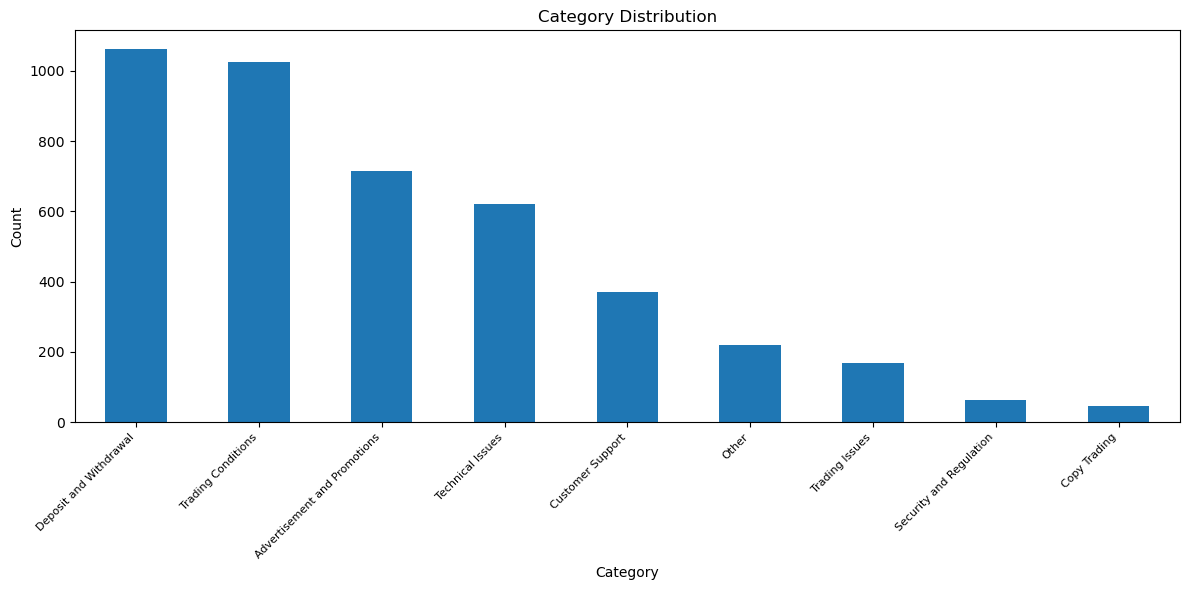

In [61]:
category_counts = merged_df['Category'].value_counts()

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45, ha='right', fontsize=8)  
plt.tight_layout()
plt.show()

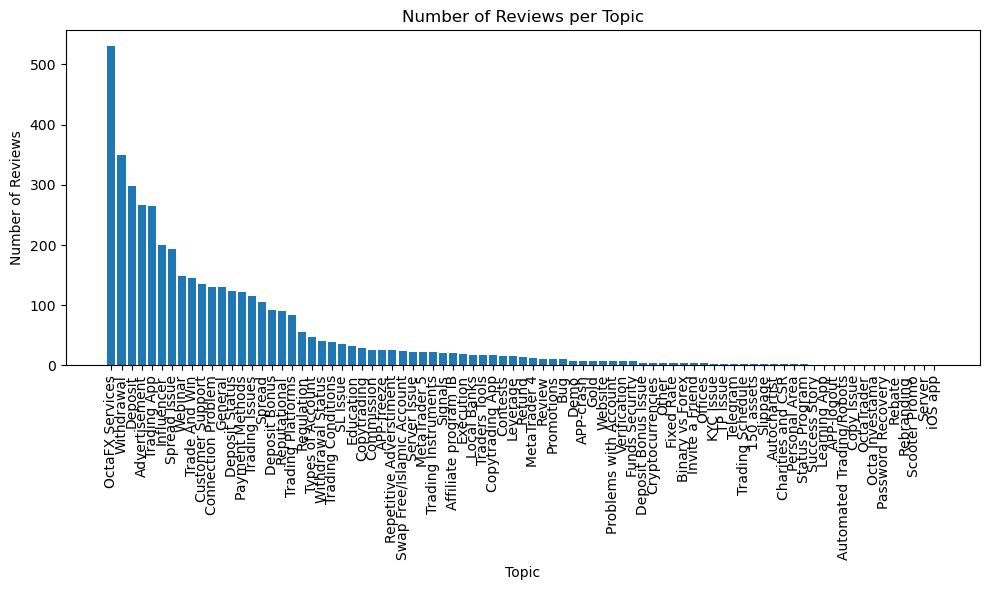

In [62]:
topic_count_sorted = topic_count.sort_values(by='Opinion', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(topic_count_sorted.index, topic_count_sorted['Opinion'])
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Topic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

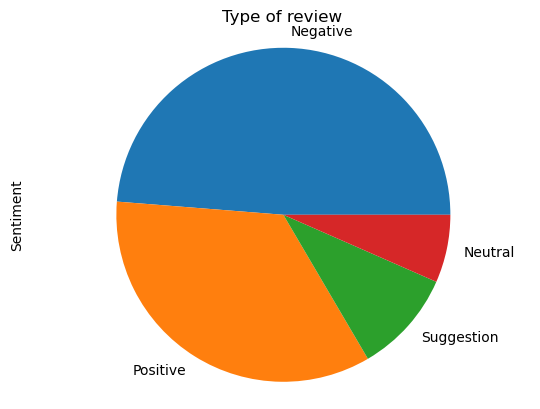

In [63]:
merged_df.Sentiment.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Type of review');

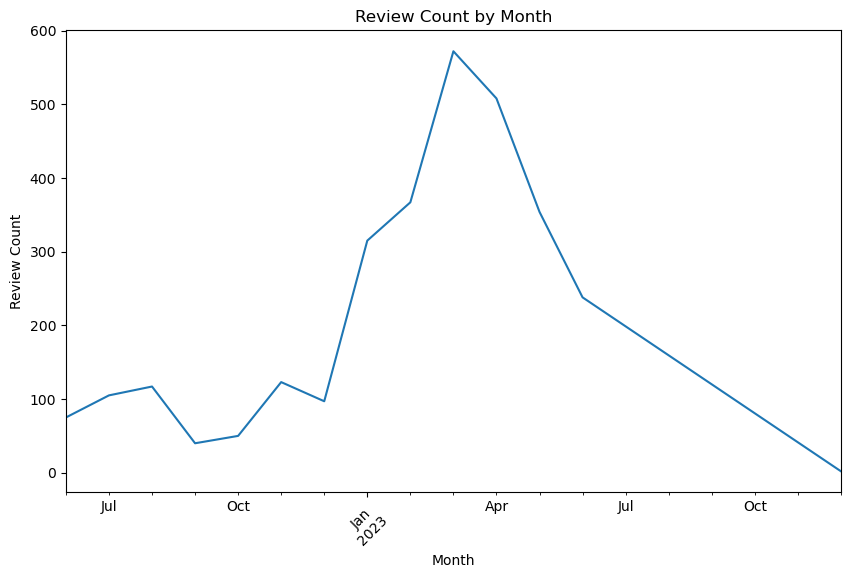

In [64]:
df['Review/Comment date'] = pd.to_datetime(df['Review/Comment date'])

reviews_by_month = df.groupby(df['Review/Comment date'].dt.to_period('M')).size()

reviews_by_month.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.title('Review Count by Month')
plt.xticks(rotation=45)
plt.show()


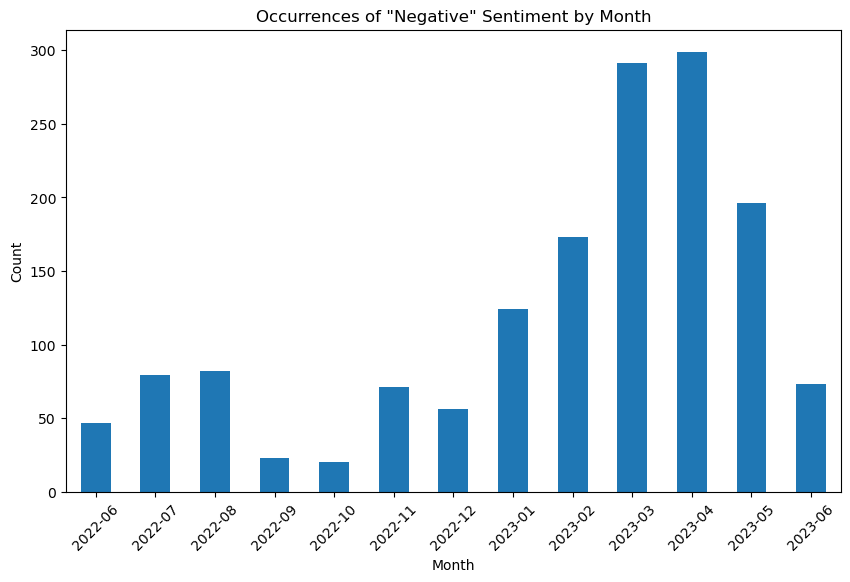

In [65]:
negative_df = df[df['Sentiment'] == 'Negative']
negative_df['Review/Comment date'] = pd.to_datetime(negative_df['Review/Comment date'])

negative_by_month = negative_df.groupby(negative_df['Review/Comment date'].dt.to_period('M')).size()

negative_by_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Occurrences of "Negative" Sentiment by Month')
plt.xticks(rotation=45)
plt.show()


In [66]:
df

,Source,Opinion,Sentiment,Topic,Review/Comment date
0,airtable,Big spread little leverage Withdraw on weekend...,Negative,"Leverage, Spread Issue, Withdrawal",2022-07-25
1,airtable,SAY NO TO WIDE SPREAD joy,Negative,Spread Issue,2022-07-25
2,airtable,Great advice I please add a cen account,Suggestion,Types of Account,2022-07-24
3,airtable,Very Good App For Trading But the Only issue i...,Negative,"Bug, Connection Problem",2022-07-22
4,airtable,Can be better if they allow indicators to be m...,Suggestion,Trading Platforms,2022-07-22
...,...,...,...,...,...
3524,Instagram INDIA,Add gift card in trade and win shop,Suggestion,Trade And Win,2023-06-06
3526,Facebook INT,it should be a zero spread\nLook at your 4 hrs...,Negative,Spread,2023-06-01
3527,Instagram INT,its awesome such a nice platform,Positive,Copytrading,2023-06-01
3528,Facebook INT,How do I open a cent account,Neutral,Types of Account,2023-06-02


In [69]:
merged_df.to_excel('/Users/obotsman/Downloads/reviews-till-june.xlsx', index=False)